In [1]:
%pip install pytholog


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pytholog as pl

In [ ]:
graph = pl.KnowledgeBase("graph")
graph([
    "way(a, b, 1)",
    "way(a, c, 4)",
    "way(b, d, 1)",
    "way(b, e, 3)",
    "way(c, f, 2)",
    "way(d, g, 4)",
    "way(e, g, 1)",
    "way(f, g, 2)"
])

```mermaid
flowchart LR
    A<-->|1|B;
    A<-->|4|C;
    B<-->|1|D;
    B<-->|3|E;
    C<-->|2|F;
    D<-->|4|G;
    E<-->|1|G;
    F<-->|2|G;
```

In [5]:
graph(
    [
        "path(X, Y, W) :- way(X , Y, W)",
        "path(X, Y, W) :- way(X, Z, W1), path(Z, Y, W2), W is W1 + W2"
    ]
)

In [8]:
answer, path = graph.query(pl.Expr("path(a, f, W)"), show_path = True)
print(answer)

[{'W': 6}, {'W': 6}, {'W': 6}, {'W': 6}]


In [9]:
print(path)

{'4', 'c', '2'}


In [10]:
print([x for x in path if str(x) > "Z"])

['c']


In [11]:
answer, path = graph.query(pl.Expr("path(a, g, W)"), show_path = True)
print(answer)
print([x for x in path if str(x) > "Z"])

[{'W': 6}, {'W': 6}, {'W': 5}, {'W': 5}, {'W': 6}, {'W': 6}, {'W': 5}, {'W': 5}, {'W': 8}, {'W': 8}, {'W': 8}, {'W': 8}, {'W': 6}, {'W': 6}, {'W': 5}, {'W': 5}, {'W': 6}, {'W': 6}, {'W': 5}, {'W': 5}, {'W': 8}, {'W': 8}, {'W': 8}, {'W': 8}]
['f', 'd', 'e', 'b', 'c']


## Map Coloring Problem
Riešenie hlavolamov.

In [12]:
country_color = pl.KnowledgeBase("city_color")
country_color([
    "different(red, green)",
    "different(red, blue)",
    "different(green, red)",
    "different(green, blue)",
    "different(blue, red)",
    "different(blue, green)",
    "coloring(Pl, Sk, Cz, Hu, At, De) :- different(Pl, Sk), different(Pl, Cz), different(Pl, De), different(Sk, Cz), different(Sk, Hu), different(Hu, At), different(Cz, De), different(Cz, At), different(At, De)"
])

In [13]:
country_color.query(pl.Expr("coloring(Poland, Slovakia, Czech_republic, Hungary, Austria, Germany)"), cut = True)

[{'Poland': 'blue',
  'Slovakia': 'red',
  'Czech_republic': 'green',
  'Hungary': 'green',
  'Austria': 'blue',
  'Germany': 'red'}]

## MHD

In [15]:
lines = pl.KnowledgeBase("lines")
# vyznam faktov bus
# bus(zastavka, linka)
lines([
    "bus(klokocina,4)",
    "bus(polygon,4)",
    "bus(divadlo,4)",
    "bus(stanicna,4)",
    "bus(chrenova,4)",
    "bus(zobor,4)",
    "bus(mlynarce,6)",
    "bus(centrum,6)",
    "bus(agrokomplex,6)",
    "bus(kynek,6)",
    "bus(diely,18)",
    "bus(nemocnica,18)",
    "bus(divadlo,18)",
    "bus(centrum,18)",
    "bus(janikovce,18)",
    "bus(dlaha,19)",
    "bus(pribinovo_namestie,19)",
    "bus(agrokomplex,19)",
    "bus(stara_nitra,19)",
    "bus(autobusova_stanica,19)",
    "bus(autobusova_stanica,5)",
    "bus(skultetyho,5)",
    "bus(dlaha,5)",
    "bus(lapas,10)",
    "bus(zobor,10)",
    "bus(stanicna,10)",
    "bus(centrum,10)",
    "bus(pribinovo_namestie,10)"
])

In [ ]:
# Stoji linka 10 na Zobore?
lines.query(pl.Expr("bus(zobor,10)"))

['Yes']

In [17]:
# Kde všade stojí linka 10?
lines.query(pl.Expr("bus(X, 10)"))

[{'X': 'centrum'},
 {'X': 'lapas'},
 {'X': 'pribinovo_namestie'},
 {'X': 'stanicna'},
 {'X': 'zobor'}]

In [19]:
# Existuje medzi dvoma zastávkami priamy spoj?
lines([
    "direct_line(X, Y) :- bus(X, L), bus(Y, L)"
])

In [ ]:
# Existuje priamy spoj medzi Zoborom a centrom?
lines.query(pl.Expr("direct_line(centrum, zobor)"))

['Yes']

In [22]:
# Existuje priamy spoj medzi Zoborom a Mlynom?
lines.query(pl.Expr("direct_line(zobor, mlyny)"))

['No']

In [23]:
# Kde sa viem priamo dostať zo Zoboru?
lines.query(pl.Expr("direct_line(zobor, X)"))

[{'X': 'chrenova'},
 {'X': 'divadlo'},
 {'X': 'klokocina'},
 {'X': 'polygon'},
 {'X': 'stanicna'},
 {'X': 'zobor'},
 {'X': 'centrum'},
 {'X': 'lapas'},
 {'X': 'pribinovo_namestie'},
 {'X': 'stanicna'},
 {'X': 'zobor'}]

In [27]:
# To isté ako `direct_line` ale vráti aj číslo linky
lines([
    "path_without_transfer(X, Y, L) :- bus(X, L), bus(Y, L)"
])

In [30]:
# Ktorou linkou sa vieme dostať priamo zo Zoboru do centra?
lines.query(pl.Expr("path_without_transfer(zobor, centrum, L)"))

[{'L': '10'}]

In [31]:
# Funkcia na nájdenie cesty medzi dvoma stanicami, pričom vráti aj prestup
lines([
    "path_transfer(X, Y, L1, L2, T) :- bus(X, L1), bus(T, L1), bus(Y, L2), bus(T, L2)"
])

In [35]:
# Akým prestupom sa vieme dostať z Klokočiny do nemocnice?
lines.query(pl.Expr("path_transfer(klokocina, nemocnica, L1, L2, T)")) # cez divadlo

[{'L1': '4', 'L2': '18', 'T': 'divadlo'}]

## Rozpoznávanie vzorov

In [36]:
%pip install numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 9.3 MB/s eta 0:00:00a 0:00:01m

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [37]:
%pip install matplotlib

  Using cached contourpy-1.3.1-cp313-cp313-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.56.0-cp313-cp313-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (101 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.2 kB)
  Using cached pillow-11.1.0-cp313-cp313-manylinux_2_28_x86_64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 9.3 MB/s eta 0:00:00a 0:00:01m
Using cached contourpy-1.3.1-cp313-cp313-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (322 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.56.0-cp313-cp313-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.8 MB)
Using cached kiwisolver-1.4.8-cp313-cp313-manyl

In [38]:
A = """
.XXX.
X...X
XXXXX
X...X
X...X
"""
T = """
XXXXX
..X..
..X..
..X..
..X..
"""

E = """
XXXXX
X....
XXX..
X....
XXXXX
"""

In [39]:
from numpy import array

In [41]:
def to_vector(letter):
    return array([+1 if c == "X" else 0 for c in letter.replace('\n', '')])

In [42]:
a_vec = to_vector(A)
t_vec = to_vector(T)
e_vec = to_vector(E)

In [55]:
a_vec

array([0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1])

In [56]:
t_vec

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0])

In [57]:
e_vec

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1])

In [46]:
def display(pattern):
    from pylab import imshow, cm, show
    imshow(pattern.reshape((5,5)),cmap=cm.binary, interpolation='nearest')
    show()

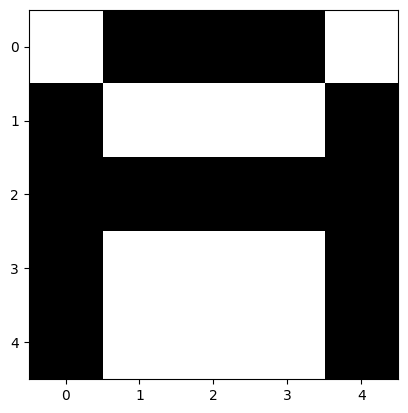

In [47]:
display(a_vec)

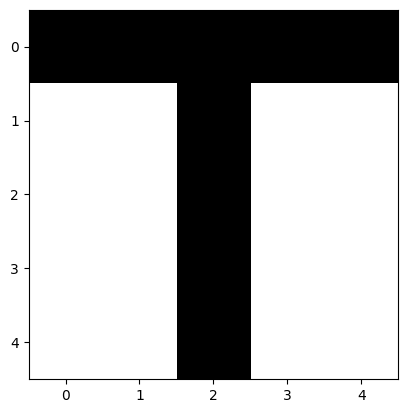

In [48]:
display(t_vec)

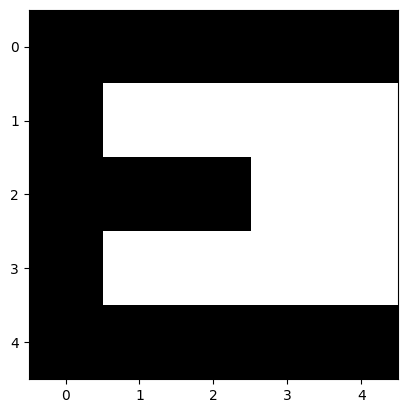

In [49]:
display(e_vec)

In [51]:
# Trošku iné A-čko
new_char = """
..X..
.X.X.
X...X
XXXXX
X...X
"""

In [52]:
new_vec = to_vector(new_char)

In [58]:
new_vec

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1])

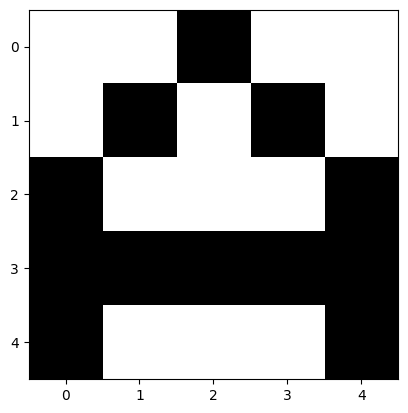

In [54]:
display(new_vec)

### Porovnanie zvorov

- Koľko bodov má spločných nový vzor so starými?
- Ako veľmi sa zhodujú?

In [61]:
import numpy as np

In [70]:
def templates(v1: np.array, v2: np.array) -> np.int64:
    """ Vráti počet spoločných bodov ktoré majú dané 2 vektory. """
    return np.sum(v1 == v2)

In [71]:
templates(a_vec, new_vec)

np.int64(13)

In [72]:
templates(t_vec, new_vec)

np.int64(8)

In [73]:
templates(e_vec, new_vec)

np.int64(8)

### Meranie vzdialenosti vektorov

In [75]:
%pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 8.0 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [76]:
from scipy.spatial import distance

In [ ]:
# Euclidean distance
dst_a = distance.euclidean(new_vec, a_vec)
dst_t = distance.euclidean(new_vec, t_vec)
dst_e = distance.euclidean(new_vec, e_vec)
print('a:', dst_a, ', t:', dst_t, ', e:', dst_e)

a: 3.4641016151377544 , t: 4.123105625617661 , e: 4.123105625617661


In [78]:
# Manhattan distance
dst_a = distance.cityblock(new_vec, a_vec)
dst_t = distance.cityblock(new_vec, t_vec)
dst_e = distance.cityblock(new_vec, e_vec)
print('a:', dst_a, ', t:', dst_t, ', e:', dst_e)

a: 12 , t: 17 , e: 17


In [ ]:
# Kosínustová korelácia
# Vzdialenosť je uhol medzi vektormi.
dst_a = distance.cosine(new_vec, a_vec)
dst_t = distance.cosine(new_vec, t_vec)
dst_e = distance.cosine(new_vec, e_vec)
print('a:', dst_a, ', t:', dst_t, ', e:', dst_e)

a: 0.4599382751326784 , t: 0.8075499102701247 , e: 0.6273220037500351
